# Курсовая работа № 2
## Аналитика. Начальный уровень

Курсовая работа состоит из двух частей – обязательной и дополнительной. **Для зачета необходимо выполнение только первой части.** Выполнение второй части может потребовать дополнительные знания Python.

- [Часть первая](#Часть-первая)
- [Часть вторая](#Часть-вторая)

## Часть первая


Перед вами стоит задача – подготовить аналитический отчет для HR-отдела. На основании проведенной аналитики предполагается составить рекомендации для отдела кадров по стратегии набора персонала, а также по взаимодействию с уже имеющимися сотрудниками.
<br><br> В базе данных лежит набор таблиц, которые содержат данные о сотрудниках вымышленной компании.
Сделайте обзор штата сотрудников компании. Составьте набор предметов исследования, а затем проверьте их на данных. Вся аналитика должна быть выполена с помощью SQL. Впоследствии данные можно визуализировать, однако финальные датафреймы для графиков также должны быть подготовлены с помощью SQL. <br><br>

Примеры гипотез:
1. Есть зависимость между `perfomance score` и тем, под чьим руководством работает сотрудник.
2. Есть зависимость между продолжительностью работы в компании и семейным положением сотрудника.
2. Есть зависимость между продолжительностью работы в компании и возрастом сотрудника.

<br><br>
Параметры для подключения следующие: хост – `dsstudents.skillbox.ru`, порт – `5432`, имя базы данных – `human_resources`, пользователь – `readonly`, пароль – `6hajV34RTQfmxhS`. Таблицы, доступные для анализа, – `hr_dataset`, `production_staff`, `recruiting_costs`, `salary_grid`.

In [1]:
import psycopg2

pg_connection = {
    "host": "dsstudents.skillbox.ru",
    "port": 5432,
    "dbname": "human_resources",
    "user": "readonly",
    "password": "6hajV34RTQfmxhS"
}
conn = psycopg2.connect(**pg_connection)
cursor = conn.cursor()

In [2]:
psycopg2.__libpq_version__

110004

In [3]:
sql_str = "SELECT table_name FROM information_schema.tables WHERE table_schema='public';"
cursor.execute(sql_str)
tables_data = [a for a in cursor.fetchall()]
conn.commit()
print("Какие таблицы содержаться в Postgres: %s" % tables_data)

Какие таблицы содержаться в Postgres: [('manager_id',), ('hr_dataset',), ('production_staff',), ('recruiting_costs',), ('salary_grid',), ('source_employee',), ('tmpDB',), ('manager',)]


Взглянем на небольшие кусочки предоставленных данных в таблицах.

In [4]:
import pandas as pd
import sqlite3
df = pd.read_sql_query("select * from public.hr_dataset limit 5;", conn) # набор кадров
df.head()

,id,Employee Name,Employee Number,marriedid,maritalstatusid,genderid,empstatus_id,deptid,perf_scoreid,age,...,Date of Hire,Days Employed,Date of Termination,Reason For Term,Employment Status,department,position,Manager Name,Employee Source,Performance Score
0,1,"Brown, Mia",1103024456,1,1,0,1,1,3,30,...,2008-10-27,3317,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Diversity Job Fair,Fully Meets
1,2,"LaRotonda, William",1106026572,0,2,1,1,1,3,34,...,2014-01-06,1420,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Website Banner Ads,Fully Meets
2,3,"Steans, Tyrone",1302053333,0,0,1,1,1,3,31,...,2014-09-29,1154,None,N/A - still employed,Active,Admin Offices,Accountant I,Brandon R. LeBlanc,Internet Search,Fully Meets
3,4,"Howard, Estelle",1211050782,1,1,0,1,1,9,32,...,2015-02-16,58,2015-04-15,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Pay Per Click - Google,N/A- too early to review
4,5,"Singh, Nan",1307059817,0,0,0,1,1,9,30,...,2015-05-01,940,None,N/A - still employed,Active,Admin Offices,Administrative Assistant,Brandon R. LeBlanc,Website Banner Ads,N/A- too early to review


In [5]:
df1 = pd.read_sql_query("select * from public.production_staff limit 5;", conn) # производственный персонал
df1.head()

,id,Employee Name,Race Desc,Date of Hire,TermDate,Reason for Term,Employment Status,Department,Position,Pay,Manager Name,Performance Score,Abutments/Hour Wk 1,Abutments/Hour Wk 2,Daily Error Rate,90-day Complaints
0,1,"Albert, Michael",White,2011-08-01,None,N/A - still employed,Active,Production,Production Manager,$54.50,Elisa Bramante,Fully Meets,0,0,0,0
1,2,"Bozzi, Charles",Asian,2013-09-30,2014-08-07,retiring,Voluntarily Terminated,Production,Production Manager,$50.50,Elisa Bramante,Fully Meets,0,0,0,0
2,3,"Butler, Webster L",White,2016-01-28,None,N/A - still employed,Active,Production,Production Manager,$55.00,Elisa Bramante,Exceeds,0,0,0,0
3,4,"Dunn, Amy",White,2014-09-18,None,N/A - still employed,Active,Production,Production Manager,$51.00,Elisa Bramante,Fully Meets,0,0,0,0
4,5,"Gray, Elijiah",White,2015-06-02,None,N/A - still employed,Active,Production,Production Manager,$54.00,Elisa Bramante,Fully Meets,0,0,0,0


In [6]:
df2 = pd.read_sql_query("select * from public.recruiting_costs limit 5;", conn) # затраты на рекрутинг
df2.head()

,id,Employment Source,January,February,March,April,May,June,July,August,September,October,November,December,Total
0,1,Billboard,520,520,520,520,0,0,612,612,729,749,910,500,6192
1,2,Careerbuilder,410,410,410,820,820,410,410,820,820,1230,820,410,7790
2,3,Company Intranet - Partner,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,Diversity Job Fair,0,5129,0,0,0,0,0,4892,0,0,0,0,10021
4,5,Employee Referral,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df3 = pd.read_sql_query("select * from public.salary_grid limit 5;", conn) # зарплата сетка
df3.head()

,id,Position,Salary Min,Salary Mid,Salary Max,Hourly Min,Hourly Mid,Hourly Max
0,1,Administrative Assistant,30000,40000,50000,14.42,19.23,24.04
1,2,Sr. Administrative Assistant,35000,45000,55000,16.83,21.63,26.44
2,3,Accountant I,42274,51425,62299,20.32,24.72,29.95
3,4,Accountant II,50490,62158,74658,24.27,29.88,35.89
4,5,Sr. Accountant,63264,76988,92454,30.42,37.01,44.45


In [8]:
df4 = pd.read_sql_query("select * from public.manager_id;", conn) # список менеджеров со статусом эффективности
df4

,manager_name,perf_score,count_id
0,John Smith,PIP,1
1,Webster Butler,Needs Improvement,2
2,Janet King,Needs Improvement,2
3,Debra Houlihan,Needs Improvement,1
4,Lynn Daneault,90-day meets,1
...,...,...,...
81,Board of Directors,Fully Meets,2
82,Ketsia Liebig,Needs Improvement,1
83,Kelley Spirea,N/A- too early to review,1
84,Michael Albert,N/A- too early to review,6


In [9]:
df5 = pd.read_sql_query("select * from public.source_employee order by count_id desc ;", conn) # источник трудоустройства
df5

,emp_source,count_id
0,Employee Referral,31
1,Diversity Job Fair,29
2,Search Engine - Google Bing Yahoo,25
3,Monster.com,24
4,Pay Per Click - Google,21
5,Professional Society,20
6,Newspager/Magazine,18
7,MBTA ads,17
8,Billboard,16
9,Vendor Referral,15


In [10]:
df6 = pd.read_sql_query("select * from public.manager order by count desc ;", conn) 
# фамилии рукводителей и кол-во менеджеров находящихся у них в подчинении
df6

,manage_name,count
0,Kelley Spirea,22
1,Michael Albert,22
2,Elijiah Gray,22
3,Kissy Sullivan,22
4,Ketsia Liebig,21
5,David Stanley,21
6,Webster Butler,21
7,Amy Dunn,21
8,Brannon Miller,21
9,Janet King,19


1. Зависимость между perfomance score и тем, под чьим руководством работает сотрудник.

In [11]:
sql_str = "SELECT count(DISTINCT age) FROM public.hr_dataset;"
cursor.execute(sql_str)
data=cursor.fetchone()
print("Количество возрастных категорий сотрудников работающих в компании : %s"  % data)
conn.commit()

Количество возрастных категорий сотрудников работающих в компании : 39


In [12]:
sql_str = """SELECT  DISTINCT "Performance Score" FROM public.hr_dataset;"""
cursor.execute(sql_str)
tables_data = [a for a in cursor.fetchall()]
conn.commit()
print("Какие значения эффективности содержаться в Performance Score: %s" % tables_data)

Какие значения эффективности содержаться в Performance Score: [('Exceptional',), ('90-day meets',), ('N/A- too early to review',), ('Fully Meets',), ('Exceeds',), ('PIP',), ('Needs Improvement',)]


In [13]:
df4 = pd.read_sql_query(""" SELECT 
       DISTINCT "Performance Score" FROM public.hr_dataset""", conn) 
df4 #Узнаем какие значения эффективности содержаться в Performance Score

,Performance Score
0,Exceptional
1,90-day meets
2,N/A- too early to review
3,Fully Meets
4,Exceeds
5,PIP
6,Needs Improvement


In [14]:
sql_str = " SELECT  count(manage_name) FROM public.manager;" 
cursor.execute(sql_str)
data=cursor.fetchone()
print("Количество (руководителей) наставников- %s"  % data)

Количество (руководителей) наставников- 21


Как видно из запроса существует 7 типов perfomance score (оценки эффективности):
Exceptional	- исключительная производительность, 
90-day meets - 90-дневный анализ эффективности,
N/A- too early to review - N/A - слишком рано пересматривать (без оценки),
Fully Meets - полностью соотвествует,
Exceeds - превосходит по эффективности,
PIP (performance improvement plan) - сотрудник включен в план по повышению эффективности,
Needs Improvement - нуждается в улучшении эффективности. 

In [15]:
df5 = pd.read_sql_query("""SELECT 
     "Manager Name", "Performance Score", COUNT("Performance Score") as count
    FROM public.hr_dataset
    GROUP BY  "Manager Name", "Performance Score"
    ORDER BY count DESC
     """, conn) 
df5

,Manager Name,Performance Score,count
0,David Stanley,Fully Meets,15
1,Kelley Spirea,Fully Meets,15
2,Kissy Sullivan,Fully Meets,14
3,Ketsia Liebig,Fully Meets,14
4,Elijiah Gray,Fully Meets,13
...,...,...,...
81,Brannon Miller,Needs Improvement,1
82,Kissy Sullivan,Exceeds,1
83,Lynn Daneault,PIP,1
84,Amy Dunn,90-day meets,1


In [16]:
# df5.groupby(['Manager Name', 'Performance Score'])['count'].agg(['sum']).sort_values(by='Manager Name').head(10)

In [17]:
df5_sum = pd.read_sql_query("""SELECT 
     "Manager Name", COUNT("Employee Name") as sum
    FROM public.hr_dataset
    GROUP BY  "Manager Name" 
    ORDER BY  sum DESC
     """, conn) # фамилии руководителей и кол-во менеджеров находящихся у них в подчинении

In [18]:
#df5_sum= df5.groupby(['Manager Name'])['count'].agg(['sum']).sort_values(by='sum', ascending=False)

In [19]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

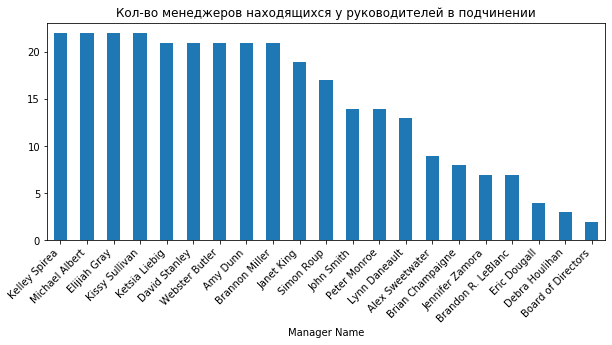

In [20]:
df5_sum.plot(kind='bar', x='Manager Name', y='sum',figsize=(10,4), legend= False,\
             title ='Кол-во менеджеров находящихся у руководителей в подчинении')
plt.xticks(rotation=45, horizontalalignment="right")
plt.show()

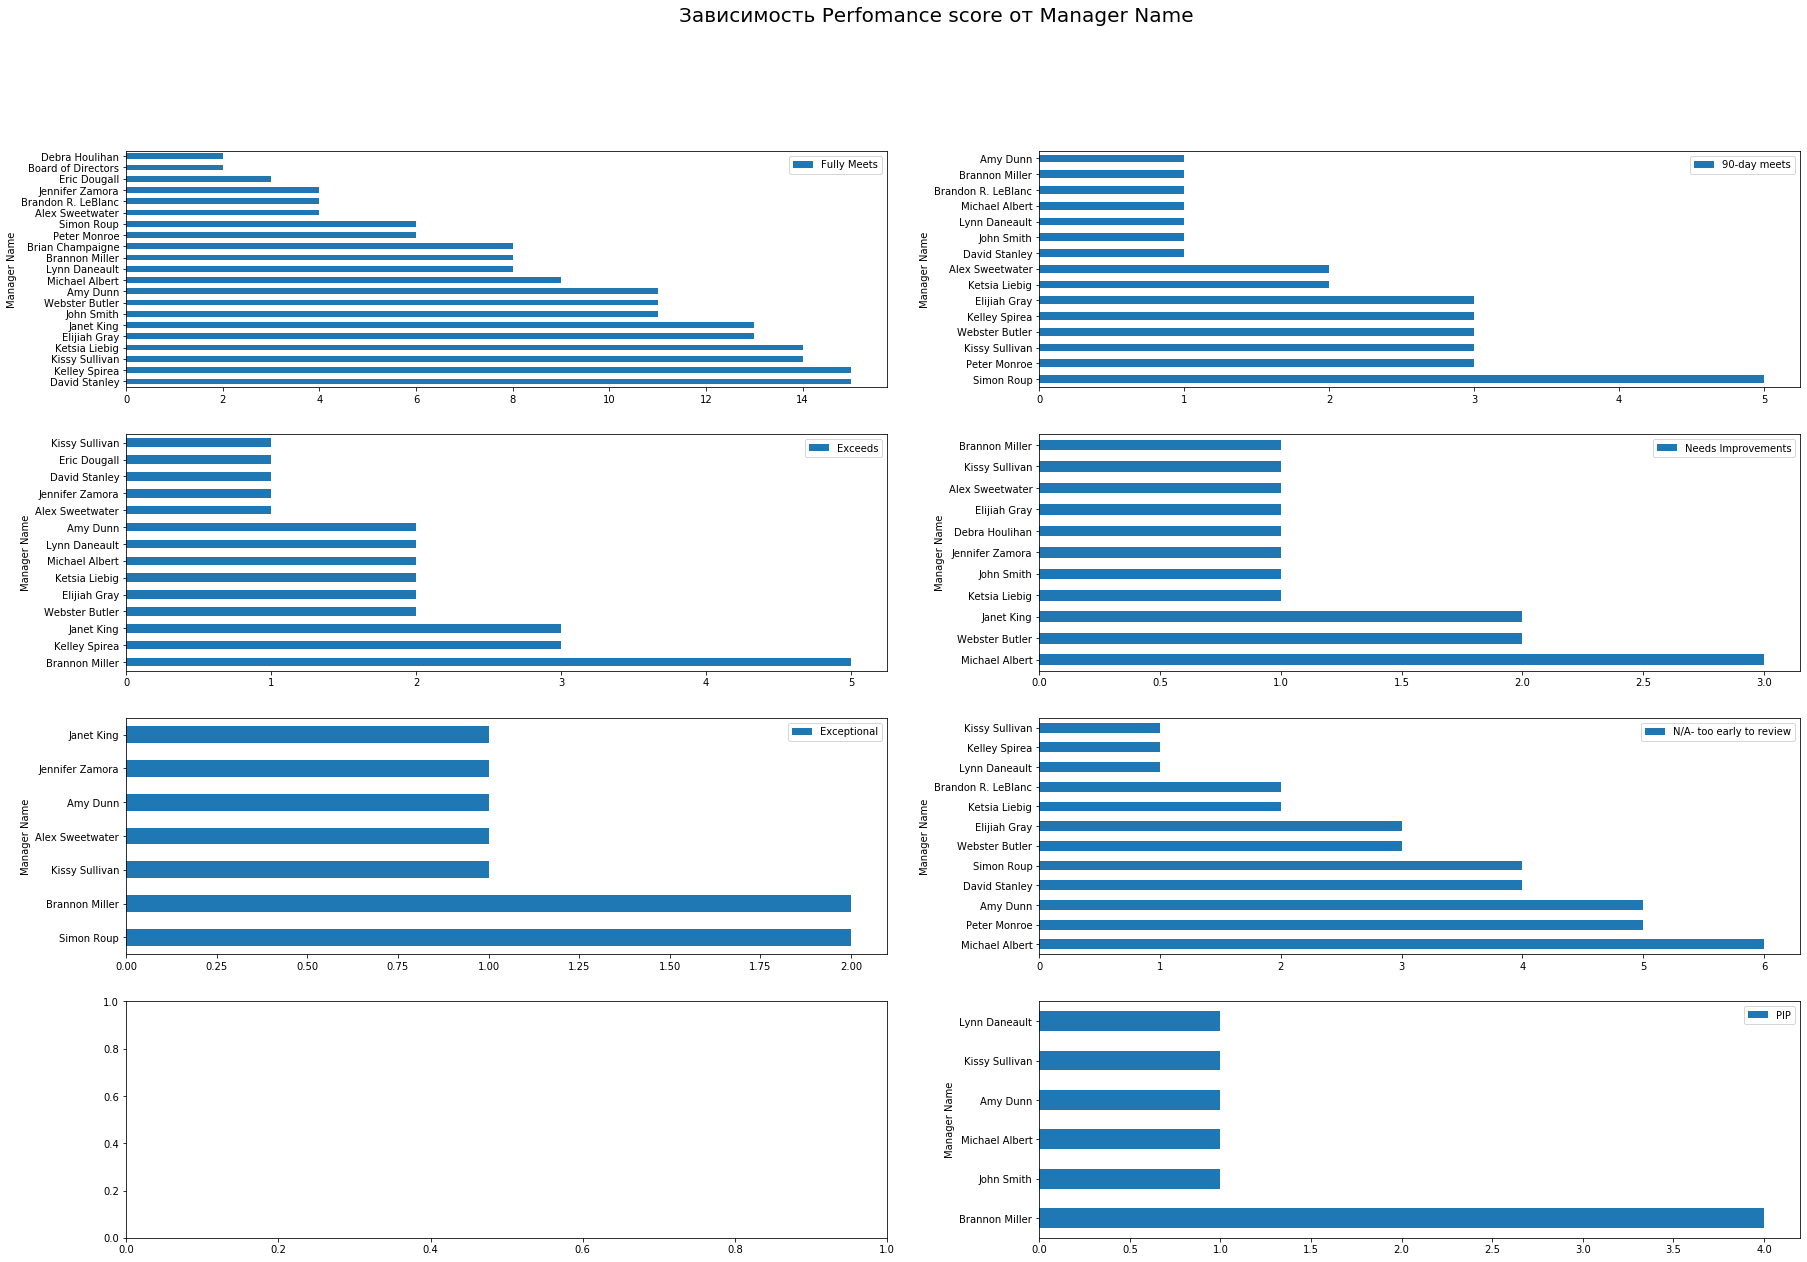

In [21]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(30,20))
fig.suptitle('Зависимость Perfomance score от Manager Name', fontsize=20)
df5[df5['Performance Score']=='Fully Meets'].plot(kind='barh',x='Manager Name', y='count', ax=axes[0,0], label='Fully Meets')
df5[df5['Performance Score']=='90-day meets'].plot(kind='barh',x='Manager Name', y='count', ax=axes[0,1], label='90-day meets')
df5[df5['Performance Score']=='Exceeds'].plot(kind='barh',x='Manager Name', y='count', ax=axes[1,0], label='Exceeds')
df5[df5['Performance Score']=='Needs Improvement'].plot(kind='barh',x='Manager Name', y='count', ax=axes[1,1], label='Needs Improvements')
df5[df5['Performance Score']=='Exceptional'].plot(kind='barh',x='Manager Name', y='count', ax=axes[2,0], label='Exceptional')
df5[df5['Performance Score']=='N/A- too early to review'].plot(kind='barh',x='Manager Name', y='count', ax=axes[2,1], label='N/A- too early to review')
df5[df5['Performance Score']=='PIP'].plot(kind='barh',x='Manager Name', y='count', ax=axes[3,1], label='PIP')
plt.show()

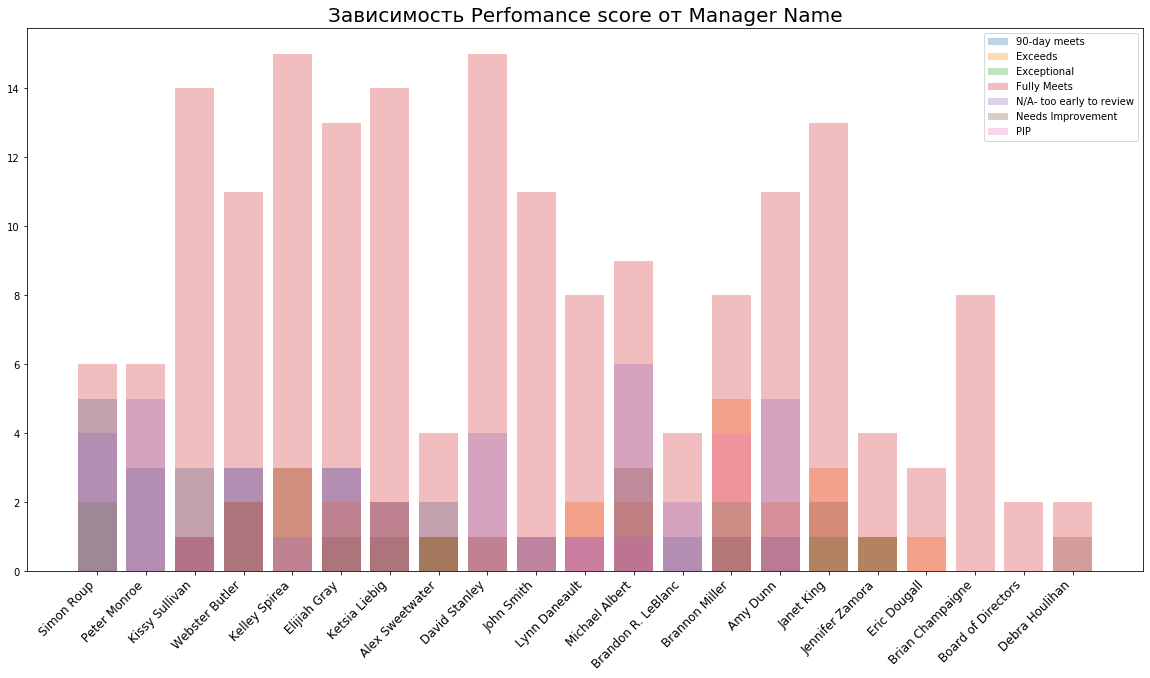

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
for key, grp in df5.groupby(['Performance Score']):
    ax.bar( grp['Manager Name'], grp['count'], label=key, alpha=0.3)
plt.xticks(rotation=45, horizontalalignment="right", fontsize=12)
plt.title('Зависимость Perfomance score от Manager Name', fontsize=20)
plt.legend()   
plt.show()

У руководителей Michael Albert, Kissy Sullivan, Kelley Spirea, Elijiah Gray	самое большое кол-во менеджеров находящихся у них в подчинении. У руководителей David Stanley, Kelley Spirea, Ketsia Liebig, Kissy Sullivan самое большое количество менеджеров с Perfomance score - Fully Meets. У руководителя Brannon Miller больше всех сотрудников с Perfomance score Exceeds и Exceptional. У него же больше всего сотрудников с Perfomance score - PIP. У руководителя Michael Albert больше всего сотрудников с Perfomance score - N/A- too early to review и Needs Improvement. У руководителя Simon Roup больше всего сотрудников с Perfomance score - 90-day meets и Exceptional.

2. Зависимость между продолжительностью работы в компании и семейным положением сотрудника.

Days Employed - продолжительность работы,
marriedid - состоящий в браке, 
maritalstatusid - семейное положение,
genderid- пол (0- женщина, 1- мужчина)

In [23]:
df6 = pd.read_sql_query("""SELECT 
    genderid, marriedid, maritalstatusid,  sum("Days Employed") as sum, avg(age) as avg
    FROM public.hr_dataset
    GROUP BY   genderid, marriedid, maritalstatusid 
    ORDER BY sum DESC
     """, conn) 
df6

,genderid,marriedid,maritalstatusid,sum,avg
0,0,0,0,106641,38.105263
1,0,1,1,95894,38.888889
2,1,0,0,81426,39.229508
3,1,1,1,57393,38.411765
4,1,0,2,18167,37.428571
5,0,0,2,14919,40.375000
6,0,0,3,12408,43.111111
7,1,0,3,8033,40.666667
8,1,0,4,4284,38.750000
9,0,0,4,2620,41.500000


Самое продолжительное время в компании работают замужние женщины средний возраст которых 38 лет, на втором месте идут незамужние женщины средний возраст которых около 39 лет, не третьем- женатые мужчины средний возраст которых 39 лет, на четвертом неженатые мужчины средний возраст которых 38 лет.

3. Зависимость между продолжительностью работы в компании и возрастом сотрудника.

In [24]:
df7 = pd.read_sql_query("""SELECT 
     age, count (age) as count, sum("Days Employed") as sum_days, avg("Days Employed") as avg_days
    FROM public.hr_dataset
    GROUP BY age
    ORDER BY avg_days DESC
     """, conn) 
df7.head()

,age,count,sum_days,avg_days
0,50,3,6167,2055.666667
1,49,7,13965,1995.000000
2,25,2,3687,1843.500000
3,40,8,13673,1709.125000
4,58,1,1635,1635.000000


In [25]:
sql_str = "SELECT AVG(age) FROM public.hr_dataset;"
cursor.execute(sql_str)
data=cursor.fetchone()
print("Средний возраст сотрудников компании: %s"  % round(data[0],2))

Средний возраст сотрудников компании: 38.87


In [26]:
sql_str = "SELECT MAX(age) FROM public.hr_dataset;"
cursor.execute(sql_str)
data=cursor.fetchone()
print("Самому возрастному сотруднику компании %s"  % round(data[0],2) + " лет")

Самому возрастному сотруднику компании 67 лет


In [27]:
sql_str = "SELECT MIN(age) FROM public.hr_dataset;"
cursor.execute(sql_str)
data=cursor.fetchone()
print("Самому молодому сотруднику компании %s"  % round(data[0],2) + " лет")

Самому молодому сотруднику компании 25 лет


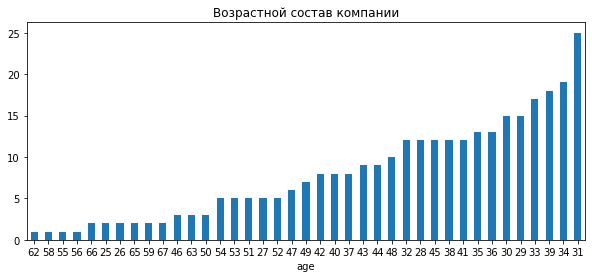

In [28]:
df7.sort_values('count').plot(kind='bar',x='age', y='count',figsize=(10,4), legend= False, title ='Возрастной состав компании')
plt.xticks(rotation=0)
plt.show()

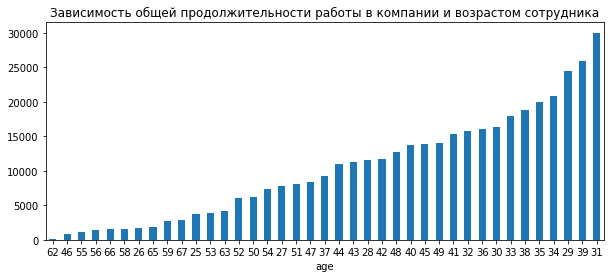

In [29]:
df7.sort_values('sum_days').plot(kind='bar',x='age', y='sum_days',figsize=(10,4),\
         legend= False, title ='Зависимость общей продолжительности работы в компании и возрастом сотрудника')
plt.xticks(rotation=0)
plt.show()

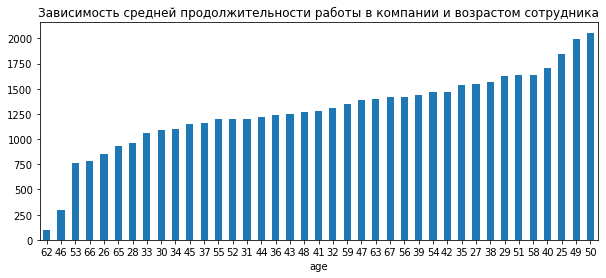

In [30]:
df7.sort_values('avg_days').plot(kind='bar',x='age', y='avg_days',figsize=(10,4),\
         legend= False, title ='Зависимость средней продолжительности работы в компании и возрастом сотрудника')
plt.xticks(rotation=0)
plt.show()

In [37]:
df8 = pd.read_sql_query("""SELECT CASE WHEN age <=  30 AND age >= 25 THEN 'Возраст  25-30 лет'
                                        WHEN age <= 35 and age > 30 THEN 'Возраст 30-35 лет'
                                        WHEN age <= 40 and age > 35 THEN 'Возраст 35-40 лет'
                                        WHEN age <= 45 and age > 40 THEN 'Возраст 40-45 лет'
                                        WHEN age <= 50 and age > 45 THEN 'Возраст 45-50 лет'
                                        WHEN age <= 55 and age > 50 THEN 'Возраст 50-55 лет'
                                        WHEN age <= 60 and age > 55 THEN 'Возраст 55-60 лет'
                                        WHEN age > 60 THEN 'Cтарше 60 лет'
                                        ELSE 'Младше 25 лет'
                                    END AS "Возрастная группа",
count (age) as "Возраст_count", AVG (age) as "Возраст_mean", 
percentile_disc(0.5) within group (order by age) as "Возраст_median",
count ("Days Employed") as "Продолжительность работы_count", 
AVG ("Days Employed") as "Продолжительность работы_mean", 
percentile_disc(0.5) within group (order by "Days Employed") as "Продолжительность работы_median"
                                FROM public.hr_dataset 
                                GROUP BY "Возрастная группа"
                                     """, conn)
df8

,Возрастная группа,Возраст_count,Возраст_mean,Возраст_median,Продолжительность работы_count,Продолжительность работы_mean,Продолжительность работы_median
0,Cтарше 60 лет,10,64.700000,65,10,1054.500000,1112
1,Возраст 25-30 лет,51,28.588235,29,51,1283.764706,1112
2,Возраст 30-35 лет,86,32.802326,33,86,1216.406977,1154
3,Возраст 35-40 лет,59,38.000000,38,59,1418.186441,1336
4,Возраст 40-45 лет,50,43.020000,43,50,1263.960000,1294
5,Возраст 45-50 лет,29,48.034483,48,29,1449.413793,1334
6,Возраст 50-55 лет,21,52.619048,53,21,1261.809524,1238
7,Возраст 55-60 лет,4,58.000000,58,4,1438.750000,1420


In [187]:
#df_group=df8.groupby(["Возрастная группа"]).agg([ 'count' , 'median', 'mean'])

In [188]:
#df_group.columns=df_group.columns.map('_'.join) 

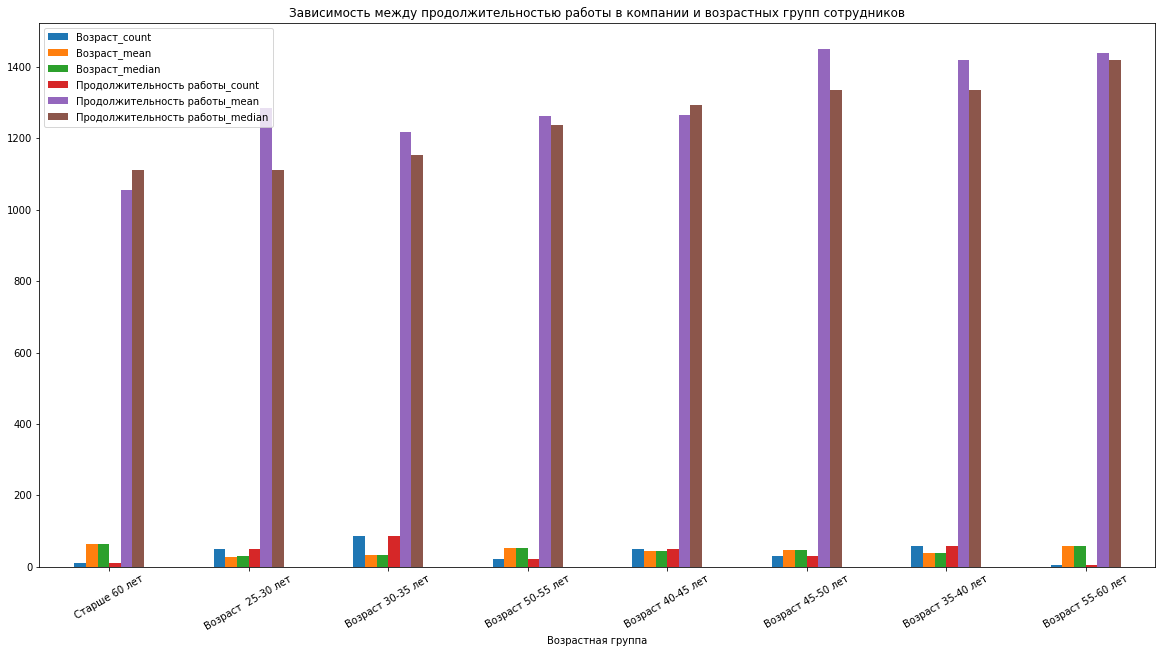

In [39]:
df8.sort_values('Продолжительность работы_median').plot(kind='bar', x='Возрастная группа', figsize=(20,10),\
         legend= True, title ='Зависимость между продолжительностью работы в компании и возрастных групп сотрудников')
plt.xticks(rotation=30)
plt.show()

Средний возраст сотрудников около около 39 лет. Самому молодому 25 лет. Самому взрослому - 67 лет. Больше всего в компании сотрудников возраст которых 31 год. Самая многочисленная группа сотрудников в возрасте от 30 до 35 лет. Самое продолжительное время в компании работают сотрудники возрастом 49 и 50 лет, а из возрастных групп сотрудники от 55 до 60 лет.

## Часть вторая

Перед вами стоит задача – подготовить аналитический ответ для SMM-отдела компании Skillbox. <br> Объектом анализа является  [паблик Skillbox Вконтакте](https://vk.com/skillbox_education). <br> <br> 
Подключитесь к  API VK и выгрузите посты со стены паблика Skillbox за интересующий период (определите самостоятельно и обоснуйте). Проанализируйте влияние различных факторов (например, времени публикации) на вовлеченность пользователей (количество лайков, комментариев, голосов в опросах). Сделайте аналитику по рубрикам (примеры рубрик: дизайн-битва, игра по управлению), которые есть в паблике. Выбрать нужные посты можно с помощью регулярных выражений. Составьте перечень рекомандаций для SMM-отдела по итогам анализа. <br> <br> 

Дополнительные инструкции по работе с API VK расположены [здесь](https://colab.research.google.com/drive/1rRaTay-OSPLAOX8V9UaFvTiAciVtp2s3).

In [ ]:
### YOUR CODE HERE ###


